## Lesson: Bayesian Inference

> Author: Matt Brems

In [ ]:
# gut feeel                 f(beta|data) =   f(data|beta) f(beta)
# prior feeel
# posterior distribution affected by prior
# frewuentist is number   f(data|beta)
# bayesian beta is distribution     f(beta|data) involves prior knowledge/distribution

Suppose I want to use your biological parents' heights to predict your height as an adult.
- $Y$: your height.
- $X$: the average of your biological parents' heights.

I want to fit a simple linear regression model $Y = \beta_0 + \beta_1X$. Let's try to infer reasonable values of $\beta_1$.

In frequentist inference, we let the data speak for itself.
- If fitting a simple linear regression model $Y = \beta_0 + \beta_1X$, our "prior knowledge" about $\beta_1$ is that $\beta_1$ equally likely to be anywhere between $-\infty$ and $+\infty$. (In effect, there is **no prior knowledge**.)

In Bayesian inference, we allow ourselves to include prior knowledge in the decision-making process.
- If fitting a simple linear regression model $Y = \beta_0 + \beta_1X$, maybe we believe that $\beta_1$ can reasonably only be between 0.8 and 1.2. We could select a Uniform(0.8, 1.2) prior or a Normal(1.0, 0.1) prior.

### Why Bayes?
- We can easily estimate $P(\text{hypothesis}|\text{data})$, which is what we want to learn about!
- Just like scientific reasoning and research builds on previous research, **we can use our understanding of the world around us to better inform our inference** rather than to pretend like we need to start from scratch every time!
- Every modeling choice we make is subjective! Selecting a prior isn't more or less subjective than removing a variable, adding an interaction term, imputing a certain value, etc. etc.

## But how do I pick a prior distribution and a likelihood?

Recall that a **distribution** is the set of all possible values of a variable and how frequently we observe each of the values.

Let's say that I find a coin on the ground. We'll let our unknown probability of flipping heads be $p$.

**Our goal, as will always be the case in Bayesian inference, is to find the posterior distribution of our unknown parameter. In this case, we want to find the posterior distribution of $p$, which is based on data we've observed and our prior beliefs.**

$$
\begin{eqnarray*}
\text{posterior} &\propto& \text{prior } \times \text{likelihood} \\
&& \\
f(p|\text{data}) &\propto& f(p) \times f(\text{data}|p)
\end{eqnarray*}
$$


### Selecting a prior distribution

Our posterior is a combination of our prior and our likelihood (data)!
- If our prior beliefs are too strong, then our posterior will be "dominated" by our prior.
- If our prior beliefs are too vague, then our posterior will be "dominated" by our data.

For the rest of the lesson, we'll go through how to choose a prior distribution and a likelihood for $p$, then visualize the impacts on $p$.

We want to construct a prior distribution for $p$. This prior distribution should summarize our beliefs about $p$ **before seeing any data**. If we know that $p$ must be between 0 and 1, then we should construct a prior distribution that reflects this knowledge.

Suppose you and I have pretty strong beliefs that $p$, the probability of flipping heads, should be 0.5. It's possible that $p$ might be a bit less than 0.5 or a bit more than 0.5.
- A very convenient distribution for this type of problem is called the [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution). The Beta distribution is a continuous distribution bound between 0 and 1. Since probabilities can take on any value between 0 and 1, we often use the Beta distribution when trying to describe our beliefs about probabilities.

In [1]:
# Import the necessary packages:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

The Beta distribution is parameterized by $\alpha$ and $\beta$, much like the Normal distribution is parameterized by $\mu$ and $\sigma$.

Let's plot a Beta distribution with parameters $\alpha = 100$ and $\beta = 100$, and look at it.
- In code, we often use `a` and `b` as the arguments because `alpha` is such a common argument in functions and we don't want to confuse the Beta distribution with a `beta` argument for the Beta distribution.

In [2]:
from scipy.stats import beta

In [4]:
# Define our alpha and beta parameters: beta distribution 
a = 100
b = 100

In [3]:
# Generate 100 x values in the appropriate
# range to use for plotting:
x = np.linspace(0,1,100)

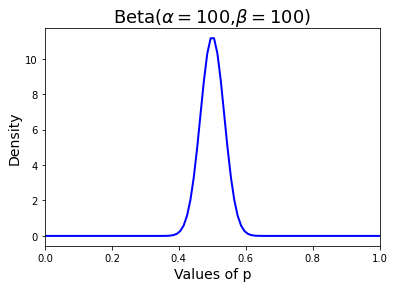

In [5]:
# Generate line plot.
plt.plot(x, beta(a,b).pdf(x),
         color='b', lw=2)

# Plot customization:
plt.ylabel('Density', fontsize = 14)
plt.xlim((0,1))
plt.xlabel('Values of p', fontsize = 14)
plt.title(r'Beta($\alpha=100$,$\beta=100$)', fontsize = 18);

In [7]:
def plot_beta(a, b):
    # Generate 100 x values in the appropriate
    # range to use for plotting:
    x = np.linspace(0, 1, 100)

    # Generate line plot.
    plt.plot(x, beta(a,b).pdf(x),
            'b', lw=2)

    # Plot customization:
    plt.ylabel('Density', fontsize = 14)
    plt.xlim((0,1))
    plt.xlabel(r'Values of $p$', fontsize = 14)
    plt.title(fr'Beta($\alpha={a}$,$\beta={b}$)', fontsize = 18);

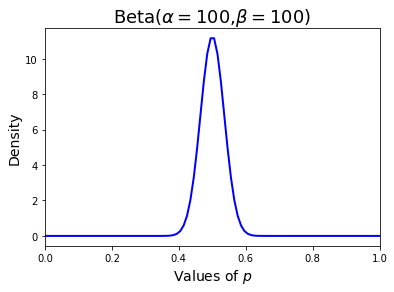

In [8]:
# Plot Beta distribution with alpha = 100, beta = 100.
plot_beta(100,100)

Take two minutes to explore the Beta distribution. Try to answer some of the following questions:
- As `a` increases, what happens?
- As `b` increases, what happens?
- Under what circumstances will the Beta distribution be symmetric?
- If I wanted a perfectly flat Beta distribution, what values of `a` and `b` would you select?
- If I wanted a Beta distribution that was centered at exactly 50% and had very little variance (almost all of the density is on exactly 50%), what values of `a` and `b` would you select?

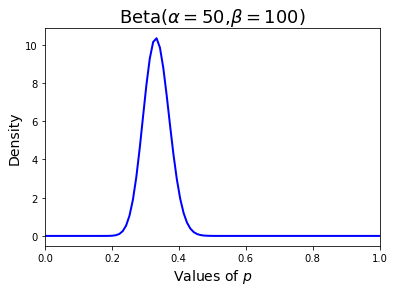

In [9]:
plot_beta(50,100)

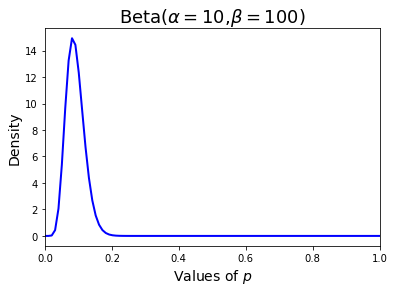

In [13]:
plot_beta(10,100)

# graph--> head is only ranging around 0.1

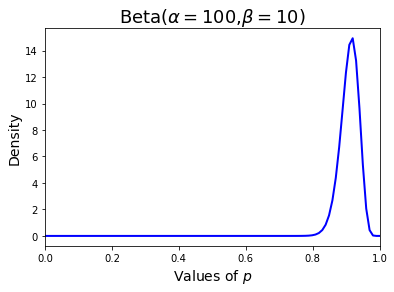

In [14]:
plot_beta(100,10)

# graph ==> ranging around 0.9

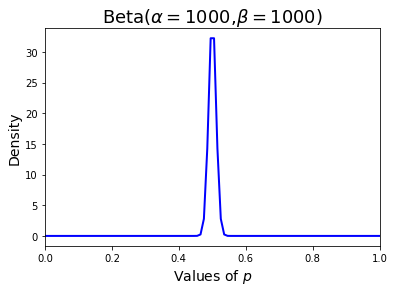

In [15]:
plot_beta(1000,1000)

# this prior--># 0.5 ranging but very confident, well informed prior

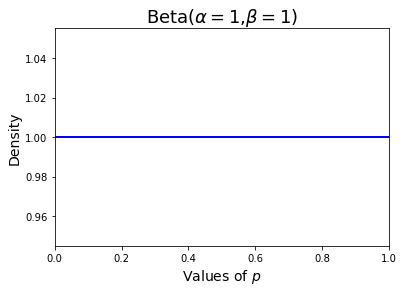

In [16]:
plot_beta(1,1)

# no confident at all

# vague prior

# rely on likelihood not prior

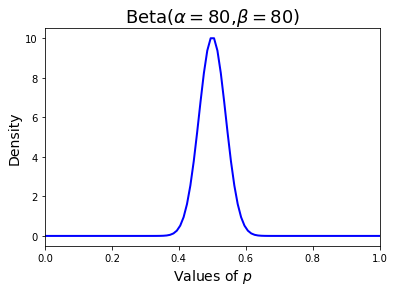

In [17]:
plot_beta(80,80)

# well informed


In [ ]:
plot_beta()

<details><summary>BONUS: The Beta distribution should be perfectly smooth. How can we get the visual to look smoother?</summary>
    
```python

def plot_beta(a, b):
    # Generate 1,000 x values in the appropriate
    # range to use for plotting:
    x = np.linspace(0, 1, 1_000)

    # Generate line plot.
    plt.plot(x, beta(a,b).pdf(x),
            'b', lw=2)

    # Plot customization:
    plt.ylabel('Density', fontsize = 14)
    plt.xlim((0,1))
    plt.xlabel(r'Values of $p$', fontsize = 14)
    plt.title(fr'Beta($\alpha={a}$,$\beta={b}$)', fontsize = 18);
```
</details>

### Selecting a likelihood

Our posterior is a combination of our prior and our likelihood (data)!

We want to construct a likelihood function for $\text{data}|p$. We are saying, "For every possible value of $p$, how likely is it that we observe this data?"

The likelihood function should model how the data are generated.

<details><summary>If I flip a fixed number of coins, what distribution should I use to model the number of heads?</summary>
A binomial distribution is probably the best model to use.
</details>

Suppose I flip my coin ten times and observe exactly 8 heads.

In [18]:
from scipy.stats import binom

In [22]:
def plot_binomial(n_trials, k_successes):
    # Generate 100 x values in the appropriate
    # range to use for plotting:
    x = np.linspace(0, 1, 100)
    
    # Plot binomial function assuming k_successes in n_trials.
    y = [binom(n=n_trials,p=i).pmf(k_successes) for i in x]

    # Generate line plot.
    plt.plot(x,y)

    # Plot customization:
    plt.ylabel('Likelihood', fontsize = 14)
    plt.xlim((0,1))
    plt.xlabel(r'Values of $p$', fontsize = 14)
    plt.title(fr'Binomial likelihood with $n={n_trials}$, $k={k_successes}$', fontsize = 18);

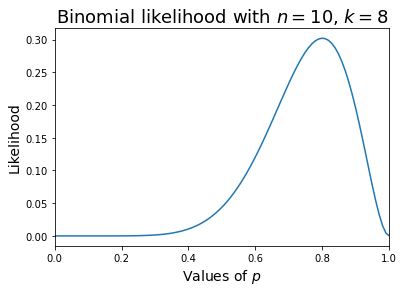

In [24]:
# Plot the Binomial likelihood with 8 successes out of 10 trials.
plot_binomial(10,8)

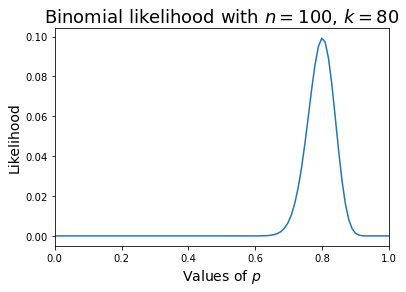

In [25]:
plot_binomial(100,80)

# no of obs higher, more data information, more confident



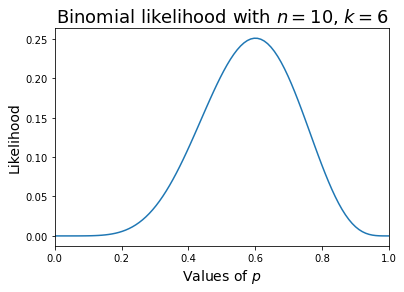

In [26]:
plot_binomial(10,6)

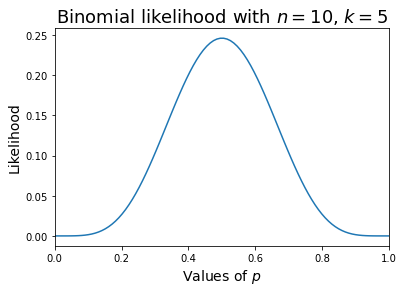

In [27]:
plot_binomial(10,5)

# symmteric at 5
# the data is confident here 

Note that my likelihood isn't dependent on my prior. **My likelihood only depends on my data!**

### The Binomial distribution is discrete. Why is my likelihood continuous??
Our likelihood function is showing, "For every possible value of $p$, how likely is it that we observe this data?"

When we talked about the Binomial distribution before, we imagined that the probability of success $p$ was fixed and known. We then looked at how likely it was to observe 8 heads given some fixed value of $p$.

In Bayesian analysis, we've observed the data... now we're trying to learn about $p$! Given the data we've observed, how likely is it that $p$ takes on the value of 0, of 0.01, of 0.02, and so on?

<details><summary>Why do we observe a peak around 0.8 here?</summary>

- Because flipped our coin ten times and saw eight heads! It makes sense that the likeliest value for our parameter $p$ is 80%, since we saw heads 80% of the time!
- You might say that $p=0.8$ **maximizes our likelihood**... more on this in a later lesson!
</details>

Take two minutes to explore the likelihood. Try to answer some of the following questions:
- As `k`, your number of successes, increases, what happens?
- As `n`, your number of trials, increases, what happens?
- Under what circumstances will the likelihood be symmetric?
- Suppose that instead of getting 7 heads out of 10 coins, you got 7000 heads out of 10000 flips. How does this influence your likelihood?

In [ ]:
plot_binomial()

### Prior * Likelihood: Simulating our Posterior

In [33]:
def plot_beta_binomial(a, b, n_trials, k_successes, steps = 100):
    # Generate 100 x values in the appropriate
    # range to use for plotting:
    lst = np.linspace(0, 1, steps)
    
    # Calculating prior, likelihood, and posterior.
    prior = [beta(a, b).pdf(i) for i in lst]
    likelihood = [binom(n_trials, i).pmf(k = k_successes) for i in lst]
    posterior = np.multiply(prior, likelihood)
    
    # Plotting colored lines here to show prior mode, the maximum likelihood value, and posterior mode.
    plt.vlines([(a - 1) / (a + b - 2), k_successes / n_trials, (a + k_successes - 1) / (a + b + n_trials - 2)],
               ymin = 0,
               ymax = max(max(prior),max(likelihood), max(posterior)), # height of dotted lines
               linestyles = 'dashed',
               colors = ['tab:orange', 'tab:green', 'tab:blue'])
    
    # Plotting prior, likelihood, and posterior.
    plt.title("Prior, Likelihood, and Posterior")
    plt.plot(lst, prior, c = 'tab:orange', label='prior');
    plt.plot(lst, likelihood, c = 'tab:green', label='likelihood');
    plt.plot(lst, posterior, c = 'tab:blue', label = 'posterior');

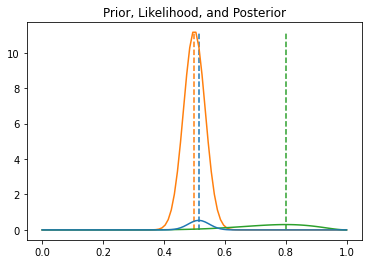

In [34]:
plot_beta_binomial(a =100 ,           # Hyperparameter alpha for Beta(alpha, beta)
                   b =100 ,           # Hyperparameter beta for Beta(alpha, beta)
                   n_trials = 10,     # Hyperparameter n for Binomial(n, k)
                   k_successes = 8)   # Hyperparameter k for Binomial(n, k)

In [ ]:
# changing alpha and beta is for prior, high number means confidence
# n_trials high
# k_success high... exp specific then posterior align wth likelihood

# posteriro is conbination of prior(domain knowledge) and likelihoood (data)

In [ ]:
# beta binomial conjugacy here ############################

Experiment with this function.
- Pick the vaguest, flattest prior you can! How does this affect our posterior?
- Pick a very, very specific prior that has almost all of its weight on 0.5. How does this affect your posterior?
- Try three or four different values of `a` and `b` in your Beta distribution. How do those influence your prior? Your posterior?
- Suppose that instead of getting 7 heads out of 10 coins, you got 7000 heads out of 10000 flips. How does this influence your likelihood? Your posterior?

In [ ]:
beta prior, binom likelihood--> beta posterior
gamma prior, poisson likelihood--> gamma posterior
normal , normal --> normal


# prior and psterior follow same distribution this is called conjugacy 